<a href="https://colab.research.google.com/github/abdulxs/Pattern-Recognition/blob/main/PR5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def perceptron(x, y, lr=0.01, iters=20, init_w=None, verbose=False):
  w = init_w
  if w is None:
    w = np.random.random((x.shape[1] + 1, ))*0.01
  x = np.hstack((np.ones((x.shape[0],1)), x))
  accuracy = 0
  for i in range(iters):
    predic = (x.dot(w) > 0 ).astype(int)
    w += lr * ((y - predic).dot(x))
    accuracy = (predic == y).mean()
    if verbose:
      print("Iteration %d" %i)
      print("Accuracy:", accuracy)
      print("\tWeights:", w)
  return [w, accuracy]

In [ ]:
binary_x = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
], dtype=float)

and_y = np.array([0, 0, 0, 1])
or_y = np.array([0, 1, 1, 1])
xor_y = np.array([0, 1, 1, 0])

and_w, and_accuracy = perceptron(binary_x, and_y)
or_w, or_accuracy = perceptron(binary_x, or_y)
xor_w, xor_accuracy = perceptron(binary_x, xor_y)

print("AND Accuracy:", and_accuracy)
print("OR Accuracy:", or_accuracy)
print("XOR Accuracy:", xor_accuracy)

AND Accuracy: 1.0
OR Accuracy: 1.0
XOR Accuracy: 0.5


Algorithm does not reach 100% accuracy because the Perceptron relies on linear separability, which only works for problems like AND and OR. XOR, however, is not linearly separable and requires a solution that a single straight line cannot provide. As a result, when training on XOR data, the Perceptron's weights oscillate without converging, preventing it from correctly separating the classes and achieving 100% accuracy.

In [ ]:
def plot_perceptron(w, minx=0, maxx=20):
  x_range = np.linspace(minx, maxx, 100)
  y = (w[0] + w[1]*x_range)/(-w[2])
  plt.plot(x_range, y)

**Task 2**

In [ ]:
data = np.genfromtxt("/content/bogus_student_data.txt", names=True)

data_x = np.stack((data["exercise_points"], data["exam_points"])).T

data_y = (data["grades"] > 2).astype(int)


In [ ]:
w1, accuracy1 = perceptron(data_x, data_y, iters=100)
print("Accuracy:", accuracy1)


w2, accuracy2 = perceptron(data_x, data_y, lr=0.00001,iters=1000)
print("Accuracy:", accuracy2)

w3, accuracy3 = perceptron(data_x, data_y, lr=0.00001, iters=1000, init_w=np.array([-50.0, 0.0, 0.0]))
print("Accuracy:", accuracy3)

Accuracy: 0.761
Accuracy: 0.7945
Accuracy: 0.9935


number of iterations, initializations values of weights can affect the accuracy

Text(0.5, 1.0, 'Task 2')

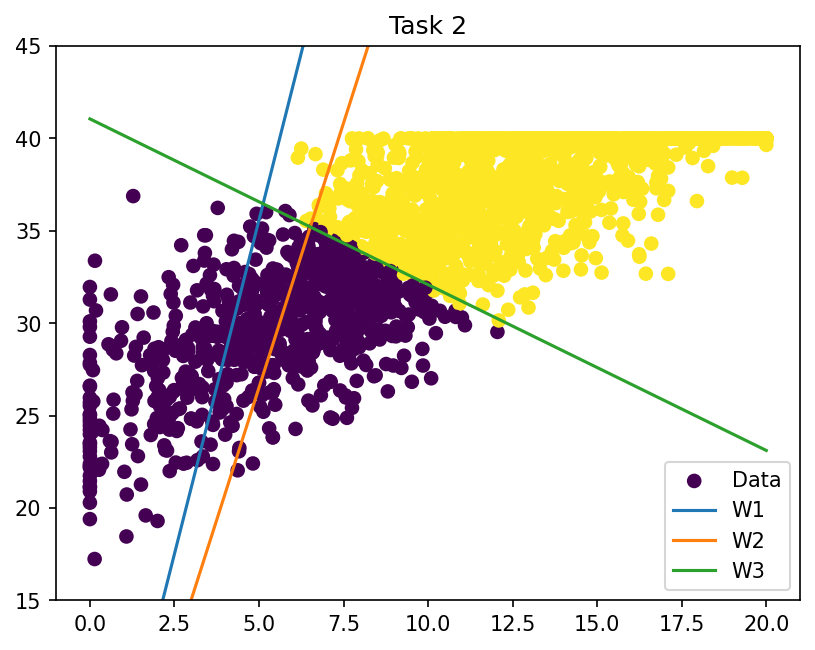

In [ ]:
fig = plt.figure(dpi=150)
plt.scatter(data_x[:,0], data_x[:,1], c = data_y)
plot_perceptron(w1)
plot_perceptron(w2)
plot_perceptron(w3)
plt.ylim(15, 45)
plt.legend(["Data", "W1", "W2", "W3"])
plt.title("Task 2")

The learned weights are good but they could be slightly better. Fine-tuning the hyperparameters could lead to a better outcome in the decision boundary.